In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt           
%matplotlib inline     
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('cars_data.csv')
df.shape

(11914, 16)

In [4]:
#Dropping undesired columns and renaming
df = df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'], axis=1)
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df = df.drop_duplicates()
df.shape

(10925, 10)

In [5]:
print(df.isnull().sum()) #detects the null/missing values 
df = df.dropna() 
df.count()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

<AxesSubplot:xlabel='Price'>

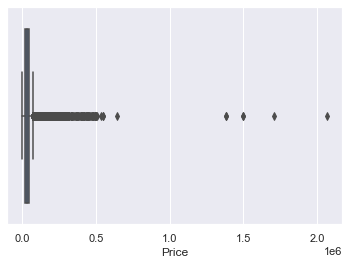

In [6]:
#Observing for Outliers in price,horsepower, and cylinders.
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

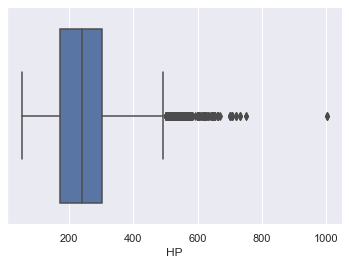

In [7]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

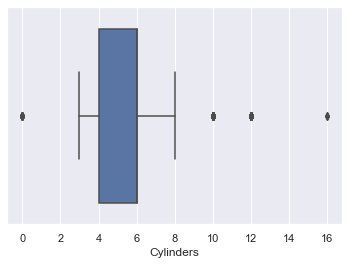

In [8]:
sns.boxplot(x=df['Cylinders'])

In [9]:
#Utilizing IQR score technique
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [10]:
#removing outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\Jason\AppData\Local\Temp/ipykernel_404/937126864.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


Text(0, 0.5, 'Number of Cars')

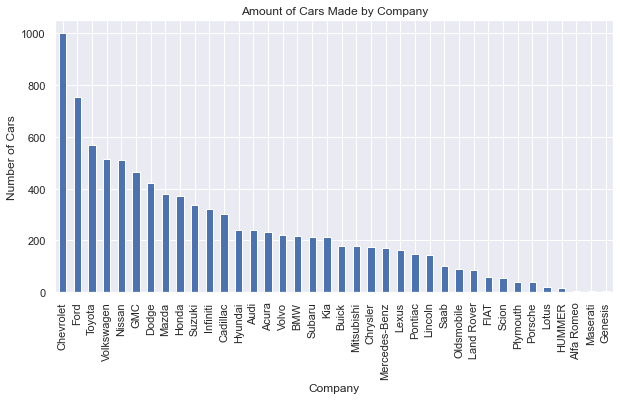

In [11]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Amount of Cars Made by Company")
plt.xlabel("Company")
plt.ylabel("Number of Cars")
#value counts -> counts unique values
#nlargest -> prints data for 40 largest value in descending order
#fig size -> 1000 x 500 pixels

Text(0.5, 1.0, 'Correlation Between HP and Price')

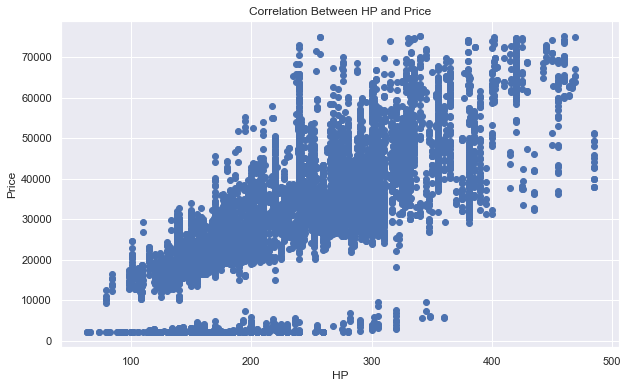

In [12]:
fig, scat = plt.subplots(figsize=(10,6))
scat.scatter(df['HP'], df['Price'])
scat.set_xlabel('HP')
scat.set_ylabel('Price')
scat.set_title('Correlation Between HP and Price')